In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [55]:
df1 = pd.DataFrame({'X': X[:, 0], 'y': y[:, 0]})
df1

,X,y
0,0.547339,5.662081
1,1.011939,7.623941
2,1.418656,7.925300
3,0.547606,4.806251
4,0.691095,5.452098
...,...,...
95,0.687138,5.811151
96,0.843744,8.352335
97,0.520935,7.459500
98,1.408579,8.453160


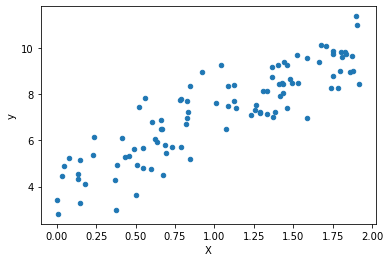

In [56]:
df1.plot(kind='scatter', x='X', y='y')

In [62]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.11080057],
       [3.01705967]])

In [63]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [64]:
X_new_b = np.c_[np.ones((2, 1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [65]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.11080057],
       [10.1449199 ]])

[0, 2, 0, 12]

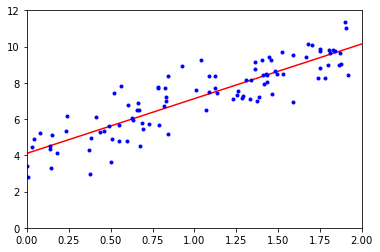

In [70]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 12])

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.11080057]), array([[3.01705967]]))

In [72]:
lin_reg.predict(X_new)

array([[ 4.11080057],
       [10.1449199 ]])

In [92]:
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.rand(2, 1)
theta
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
print("END: " + str(theta))

END: [[4.11080057]
 [3.01705967]]


array([[4.18281134],
       [3.03330954]])

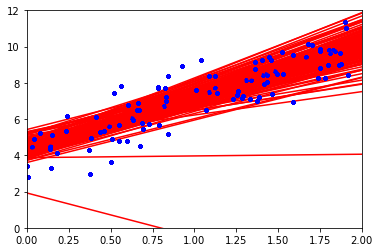

In [102]:
##--SGD
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m - yi)
        theta = theta - eta * gradients
        y_predict = X_new_b.dot(theta)
        plt.plot(X_new, y_predict, "r-")
        plt.plot(X, y, 'b.')
        plt.axis([0, 2, 0, 12])
theta

[0, 2, 0, 12]

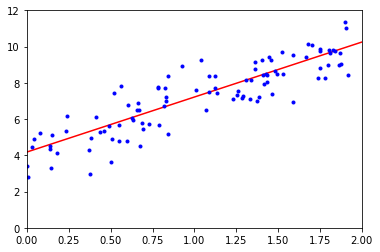

In [103]:
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 12])

In [111]:
y.ravel() ## == y.T[0, :]

array([ 5.6620813 ,  7.62394075,  7.92529992,  4.80625115,  5.45209809,
        9.26500798,  6.79657952,  4.43916044,  6.12356962,  7.72651967,
        6.1561296 ,  8.43786048,  7.39236936,  6.50556128,  2.97426147,
        8.74223048,  5.69387603,  6.9527944 ,  6.50271127, 10.11417169,
        9.83991947,  5.62864001,  5.35079491,  8.28161678, 11.00206467,
        8.95632003,  4.88217978,  9.71566181,  6.50910406,  9.26671381,
        7.09950261,  9.86005888,  7.13243372,  8.48379848,  4.91362096,
        7.41452393,  7.16821219,  7.49965746,  3.41317519,  9.8188594 ,
        8.29215979,  8.9846276 ,  7.82077933,  4.10738819,  5.32555425,
        7.73370075,  7.71963552,  8.47208233,  9.73046914,  7.01942758,
        9.41936594,  4.93766817, 11.37298079,  7.78921928, 10.12625004,
        7.31158129,  3.28780844,  4.33813341,  4.77635141,  5.22228052,
        9.28382961,  4.5121005 ,  9.62407919,  5.9473608 ,  7.24551936,
        8.4799166 ,  4.54050996,  7.23107537,  8.44624427,  8.98

In [117]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
df1 = pd.DataFrame({"X":X[:, 0], "y":y[:, 0]})
df1

,X,y
0,-1.834339,0.074394
1,-1.574493,1.576070
2,1.379232,5.447346
3,-0.837974,1.055948
4,-2.957580,2.887326
...,...,...
95,-2.634401,1.725819
96,0.409280,2.023780
97,-1.572348,1.053852
98,-0.025926,1.464830


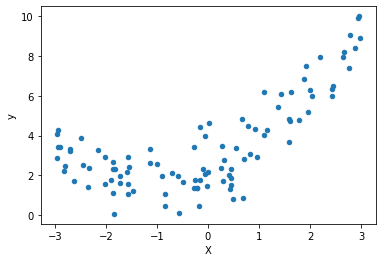

In [118]:
df1.plot(kind="scatter",x="X", y="y")

In [119]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-1.83433867])

In [120]:
X_poly[0]

array([-1.83433867,  3.36479836])

In [122]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.24456013]), array([[0.98788452, 0.46073941]]))

In [157]:
y_new = lin_reg.predict(X_poly)

In [162]:
X_poly[:, 0]

array([-1.83433867, -1.57449302,  1.37923154, -0.83797409, -2.95758038,
        2.76687466, -2.33953165, -2.1595924 ,  1.63394113,  0.01891693,
       -0.09367595, -1.46738353,  2.87074534, -2.94048928,  1.43485233,
       -1.13874695,  0.69609806,  2.93287801, -2.69534823, -0.05439762,
        0.42922675,  0.45083601, -2.01725674, -2.44255697, -1.57003151,
       -2.96856812,  2.44422938, -0.28287106,  1.95466985,  2.98109349,
       -1.82061817,  0.96619159, -0.06843303,  0.44836539, -0.49634899,
        2.20139209,  0.79267129,  0.29334169, -0.27753687, -1.86084643,
        1.77894519, -2.01439049,  0.48552807,  0.67663131,  1.15867115,
        1.58519645, -0.15119559, -2.90814707, -1.85655892,  0.00442756,
       -2.81543715,  2.00267051, -0.9033534 ,  2.63680062, -1.00897188,
       -1.724494  ,  2.96409432, -0.69798306, -2.93373538, -1.55105438,
        2.43294974, -2.49408572, -1.13376034,  2.66222587,  1.60312807,
        2.42781037, -0.14960488, -0.20773597,  1.91291222,  2.02

[-3, 3, 0, 10]

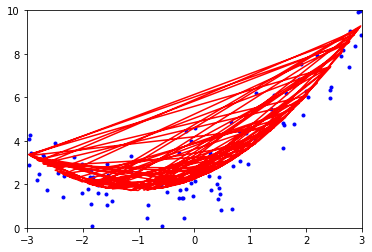

In [223]:
plt.plot(X, y, 'b.')
plt.plot(X[:, 0], y_new, 'r-')
plt.axis([-3, 3, 0, 10])

[0.0, 0.0, 1.5548379753807031, 2.357135466628263, 2.1952527502811057, 2.7209618485337455, 2.465563990382541, 2.8540290480883814, 2.5599461165142348, 2.419607343742605, 2.2005067890541863, 2.8326832980105188, 2.703921481236987, 2.585696655533436, 2.6507427660806497, 2.861463333383237, 2.861292102177637, 2.7167580690322715, 2.753101394345371, 2.93443479003459, 2.798267992924388, 2.6711464524503827, 2.5557080326926793, 2.89080832149186, 3.141219618671444, 3.064803435779926, 3.015133570773103, 2.9142290284679153, 2.8159167709932227, 2.806094745640263, 2.7992121842053055, 2.711834353801846, 2.7592894081762265, 2.7035656187180064, 2.6308644105464625, 2.5722910149115035, 2.5632313812603114, 2.513353951200679, 2.482920803955654, 2.80838706485945, 2.851280977343327, 2.7853300629737596, 2.7256960168666833, 2.668752189719775, 2.617238395646244, 2.6270454953510165, 2.678615522064808, 2.6230614574646967, 2.6834301110219254, 2.7932432456621012, 2.7558592440043057, 2.7229247374665624, 2.7176424973538

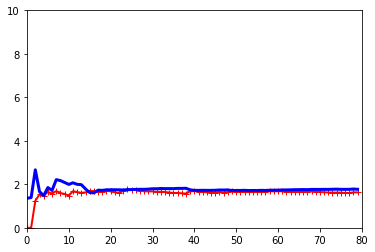

In [219]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val[:m])
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val[:m], y_val_predict))
    print(train_errors)
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.axis([0, 80, 0, 10])
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

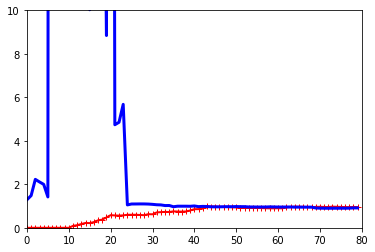

In [218]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X,y )

In [231]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.98573484]])

In [241]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor()
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.95032036])

In [233]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.93616366])

In [242]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.9392344])

In [250]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [251]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [252]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
X_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [255]:
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

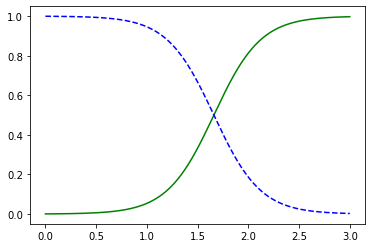

In [257]:
plt.plot(X_new, y_proba[:, 1], "g-", label="Ирис Вергинский")
plt.plot(X_new, y_proba[:, 0], "b--")